# GITHUB Link

https://github.com/vaibhavblr/Class12Project

# Objective

To analyse New York taxi trip data and generate possible insights. This is known as exploratory data analysis. Brief information about input data is provided as below.

VendorID : A code indicating the TPEP provider that provided the record.
           1 = Creative Mobile Technologies, LLC.
           2 = VeriFone Inc.
           
tpep_pickup_datetime : The date and time when the meter was engaged.

tpep_dropoff_datetime : The date and time when the meter was disengaged.

Passenger_count : The number of passengers in the vehicle.
                  This is a driver-entered value.
                  
Trip_distance : The elapsed trip distance in miles reported by the taximeter.

PULocationID : TLC Taxi Zone in which the taximeter was engaged.

DOLocationID : TLC Taxi Zone in which the taximeter was disengaged.

RateCodeID : The final rate code in effect at the end of the trip.
             1- Standard rate
             2=JFK
             3-Newark
             4-Nassau or Westchester
             S-Negotiated fare
             6-Group ride
             
Store_and_fwd_flag : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward," because the vehicle did not have a connection to the server.
             Y=store and forward trip
             N= not a store and forward trip
             
Payment_type : A numeric code signifying how the passenger paid for the trip.
                1= Credit card
                2= Cash
                3- No charge
                4- Dispute
                5- Unknown
                6= Voided trip
                
Fare_amount : The time-and-distance fare calculated by the meter.

Extra : Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges

MTA_tax : $0.50 MTA tax that is automatically triggered based on the metered rate in use.

Improvement_surcharge : $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

Tip_amount : This field is automatically populated for credit card tips. Cash tips are not included.

Tolls_amount : Total amount of all tolls paid in trip.

Total_amount : The total amount charged to passengers. Does not include cash tips.

In [1]:
import pandas as pd

# Reading data from input files

In [2]:
# reading taxi trip data
trip_data=pd.read_csv(
'https://github.com/vaibhavblr/Class12Project/raw/main/Taxi_Trip_Data.csv'
)
trip_data.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2020-12-01T00:33:40.000Z,2020-12-01T01:00:35.000Z,1.0,16.74,2.0,N,132,164,1.0,52.0,0.0,0.5,2.50,6.12,0.3,63.92,2.5
1,1.0,2020-12-01T00:08:15.000Z,2020-12-01T00:16:04.000Z,2.0,2.70,1.0,N,237,107,1.0,9.5,3.0,0.5,2.65,0.00,0.3,15.95,2.5


In [3]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145435 entries, 0 to 145434
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               135636 non-null  float64
 1   tpep_pickup_datetime   145435 non-null  object 
 2   tpep_dropoff_datetime  145435 non-null  object 
 3   passenger_count        135636 non-null  float64
 4   trip_distance          145435 non-null  float64
 5   RatecodeID             135636 non-null  float64
 6   store_and_fwd_flag     135636 non-null  object 
 7   PULocationID           145435 non-null  int64  
 8   DOLocationID           145435 non-null  int64  
 9   payment_type           135636 non-null  float64
 10  fare_amount            145435 non-null  float64
 11  extra                  145435 non-null  float64
 12  mta_tax                145435 non-null  float64
 13  tip_amount             145435 non-null  float64
 14  tolls_amount           145435 non-nu

## Inferences-1

*  Few columns like 'VendorID', 'passenger_count','RatecodeID', 'store_and_fwd_flag' are having empty fields

In [4]:
# reading taxi zone data
taxi_zone_data=pd.read_csv(
'https://github.com/vaibhavblr/Class12Project/raw/main/taxi_zone_lookup.csv'
)
taxi_zone_data.head(2)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone


In [5]:
taxi_zone_data.describe(include='all')

,LocationID,Borough,Zone,service_zone
count,265.000000,265,264,263
unique,NaN,7,261,4
top,NaN,Queens,Governor's Island/Ellis Island/Liberty Island,Boro Zone
freq,NaN,69,3,205
mean,133.000000,NaN,NaN,NaN
std,76.643112,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,67.000000,NaN,NaN,NaN
50%,133.000000,NaN,NaN,NaN
75%,199.000000,NaN,NaN,NaN


## Inferences-2

* There are 265 'LocationIDs', but 264 corresponding 'Zones'. It implies, for one 'LocationID', there is no 'Zone' details available
* 261 unique zones are there. Expected number is : 264. 
* 3 number of 'LocationIDs' are having duplicate 'Zones'

In [6]:
# Converting pickup and drop time to 'DateTime' object
trip_data['tpep_pickup_datetime'] = \
pd.to_datetime(trip_data['tpep_pickup_datetime'],format='%Y-%m-%dT%H:%M:%S.000Z')

trip_data['tpep_dropoff_datetime'] = \
pd.to_datetime(trip_data['tpep_dropoff_datetime'],format='%Y-%m-%dT%H:%M:%S.000Z')

In [7]:
# drop old formatted pickup and drop time
trip_data.rename(columns={'tpep_pickup_datetime': 'pickup_time'}, inplace=True)
trip_data.rename(columns={'tpep_dropoff_datetime': 'drop_time'}, inplace=True)
trip_data.head(2)

,VendorID,pickup_time,drop_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,132,164,1.0,52.0,0.0,0.5,2.50,6.12,0.3,63.92,2.5
1,1.0,2020-12-01 00:08:15,2020-12-01 00:16:04,2.0,2.70,1.0,N,237,107,1.0,9.5,3.0,0.5,2.65,0.00,0.3,15.95,2.5


In [8]:
# replace PULocationID with corresponding zone name..join with other dataframe
trip_data.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
trip_merge1 = pd.merge(trip_data, taxi_zone_data[['Zone','LocationID']],
                       on=['LocationID'])
trip_merge1.rename(columns={'Zone': 'Pickup_Zone'}, inplace=True)
trip_merge1.drop(['LocationID'], axis=1, inplace=True)

In [9]:
# replace DOLocationID with corresponding zone name..join with other dataframe
trip_merge1.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)
trip_merge2 = pd.merge(trip_merge1, taxi_zone_data[['Zone','LocationID']], 
                       on=['LocationID'])
trip_merge2.rename(columns={'Zone': 'Drop_Zone'}, inplace=True)
trip_merge2.drop(['LocationID'], axis=1, inplace=True)

In [10]:
trip_merge2['trip_duration(min)'] = \
   ((trip_merge2['drop_time'] - trip_merge2['pickup_time'])\
   / pd.Timedelta(minutes=1)).round(2)
trip_merge2.head(2)

,VendorID,pickup_time,drop_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Pickup_Zone,Drop_Zone,trip_duration(min)
0,2.0,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,1.0,52.0,0.0,0.5,2.5,6.12,0.3,63.92,2.5,JFK Airport,Midtown South,26.92
1,2.0,2020-12-01 11:46:04,2020-12-01 12:18:41,1.0,17.25,2.0,N,1.0,52.0,0.0,0.5,10.0,6.12,0.3,71.42,2.5,JFK Airport,Midtown South,32.62


# Data Cleaning

In [11]:
# Finding number of records for columns which has null values
null_rec_cnt = {'VendorID(null) count': [trip_merge2['VendorID'].\
                                         isnull().sum()],
                
                'passenger_count(null)': [trip_merge2['passenger_count'].\
                                          isnull().sum()],
                
                'RatecodeID(null) count': [trip_merge2['RatecodeID'].\
                                           isnull().sum()],
                
                'store_and_fwd_flag(null) count': \
                    [trip_merge2['store_and_fwd_flag'].isnull().sum()],
                
                'payment_type(null) count': [trip_merge2['payment_type'].\
                                             isnull().sum()]}
df = pd.DataFrame(null_rec_cnt)
df

,VendorID(null) count,passenger_count(null),RatecodeID(null) count,store_and_fwd_flag(null) count,payment_type(null) count
0,9799,9799,9799,9799,9799


In [12]:
trip_merge2.store_and_fwd_flag.value_counts(dropna=False)

N      133639
NaN      9799
Y        1997
Name: store_and_fwd_flag, dtype: int64

## Inferences-3

*  9799 records have no value for columns 'VendorID', 'passenger_count','RatecodeID', 'store_and_fwd_flag' and 'payment_type'
*  Looks like whenever records are stored in device and later pushed to server (store_and_fwd_flag=Y), possibly few columns are not getting updated

In [13]:
# filter out records based on following conditions
# trip_distance > 0
# total_amount > 0
# drop time > pickup time
# passenger_count > 0
# store_and_fwd_flag is not null

filter_trip_data = trip_merge2[(trip_merge2['trip_distance'] > 0) &
                               
                               (trip_merge2['total_amount'] > 0 ) &
                               
                               (trip_merge2['drop_time'] > \
                                        trip_merge2['pickup_time']) &
                               
                               (trip_merge2['passenger_count'] > 0) &
                               
                               (trip_merge2['store_and_fwd_flag'].\
                                        isnull() == False)]
filter_trip_data.head(2)

,VendorID,pickup_time,drop_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Pickup_Zone,Drop_Zone,trip_duration(min)
0,2.0,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,1.0,52.0,0.0,0.5,2.5,6.12,0.3,63.92,2.5,JFK Airport,Midtown South,26.92
1,2.0,2020-12-01 11:46:04,2020-12-01 12:18:41,1.0,17.25,2.0,N,1.0,52.0,0.0,0.5,10.0,6.12,0.3,71.42,2.5,JFK Airport,Midtown South,32.62


In [14]:
# typecast few columns to integer type
filter_trip_data[['VendorID', 'passenger_count', 'RatecodeID','payment_type']] = \
         filter_trip_data[['VendorID','passenger_count', 'RatecodeID',
                           'payment_type']].astype('int64')

C:\Users\hp ssd\AppData\Local\Temp\ipykernel_3700\4279131569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_trip_data[['VendorID', 'passenger_count', 'RatecodeID','payment_type']] = \


# Data Augmentation

In [15]:
# Adding day of week columns from timestamp
filter_trip_data['Pickup_Day_Week'] = filter_trip_data['pickup_time'].\
                                                        dt.day_name()

C:\Users\hp ssd\AppData\Local\Temp\ipykernel_3700\636654993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_trip_data['Pickup_Day_Week'] = filter_trip_data['pickup_time'].\


In [16]:
def  convert_time_2_hrday(entry):
    if (entry.hour > 4) & (entry.hour <= 10):
        return 'Morning(4am-10am)'
    elif (entry.hour > 10) & (entry.hour <= 16):
        return 'Midday(10am-4pm)'
    elif (entry.hour > 16) & (entry.hour <= 22):
        return 'Evening(4pm-10pm)'
    elif (entry.hour > 22) | (entry.hour <= 4):
        return 'LateNight(10pm-4am)'
    else:
        return 'None'
    
filter_trip_data['Hour_of_Day'] =\
    filter_trip_data.pickup_time.apply(convert_time_2_hrday)

C:\Users\hp ssd\AppData\Local\Temp\ipykernel_3700\873404404.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_trip_data['Hour_of_Day'] =\


In [17]:
def  convert_ratecode(entry):
   if entry == 1:
      return 'Standard Rate'
   elif entry == 2:
      return 'JFK'
   elif entry == 3:
      return 'Newyork'
   elif entry == 4:
      return 'Nassau'
   elif entry == 5:
      return 'Negotiated Fare'
   elif entry == 6:
      return 'Groupride'    
   else:
      return 'None'
    
filter_trip_data['RatecodeID'] = \
    filter_trip_data.RatecodeID.apply(convert_ratecode)

C:\Users\hp ssd\AppData\Local\Temp\ipykernel_3700\1784769608.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_trip_data['RatecodeID'] = \


In [18]:
def  convert_paymenttype(entry):
   if entry == 1:
      return 'Credit Card'
   elif entry == 2:
      return 'Cash'
   elif entry == 3:
      return 'No charge'
   elif entry == 4:
      return 'Dispute'
   elif entry == 5:
      return 'Unknown'
   elif entry == 6:
      return 'Voided trip'    
   else:
      return 'None'
    
filter_trip_data['payment_type'] = \
  filter_trip_data.payment_type.apply(convert_paymenttype)

C:\Users\hp ssd\AppData\Local\Temp\ipykernel_3700\2374586973.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_trip_data['payment_type'] = \


In [19]:
filter_trip_data.head(2)

,VendorID,pickup_time,drop_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Pickup_Zone,Drop_Zone,trip_duration(min),Pickup_Day_Week,Hour_of_Day
0,2,2020-12-01 00:33:40,2020-12-01 01:00:35,1,16.74,JFK,N,Credit Card,52.0,0.0,...,2.5,6.12,0.3,63.92,2.5,JFK Airport,Midtown South,26.92,Tuesday,LateNight(10pm-4am)
1,2,2020-12-01 11:46:04,2020-12-01 12:18:41,1,17.25,JFK,N,Credit Card,52.0,0.0,...,10.0,6.12,0.3,71.42,2.5,JFK Airport,Midtown South,32.62,Tuesday,Midday(10am-4pm)


# Generating report

##### VendorID Names

* 1 ==> Creative Mobile Technologies
* 2 ==> VeriFone Inc

<AxesSubplot:ylabel='VendorID'>

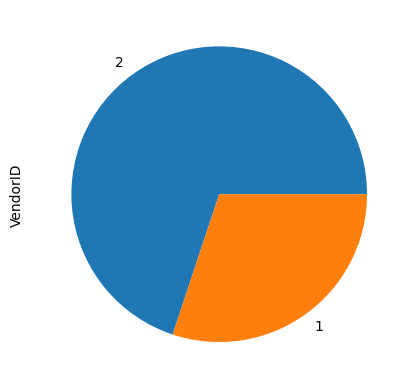

In [20]:
filter_trip_data['VendorID'].value_counts().plot(kind='pie',)

In [21]:
temp_pd = filter_trip_data[filter_trip_data.VendorID == 2][['VendorID',
                'Pickup_Day_Week']].groupby('Pickup_Day_Week').count()
temp_pd.rename(columns={'VendorID': 'VendorID-2'}, inplace=True)

In [22]:
temp_pd1 = filter_trip_data[filter_trip_data.VendorID == 1][['VendorID',
                'Pickup_Day_Week']].groupby('Pickup_Day_Week').count()
temp_pd1.rename(columns={'VendorID': 'VendorID-1'}, inplace=True)

<AxesSubplot:xlabel='Pickup_Day_Week'>

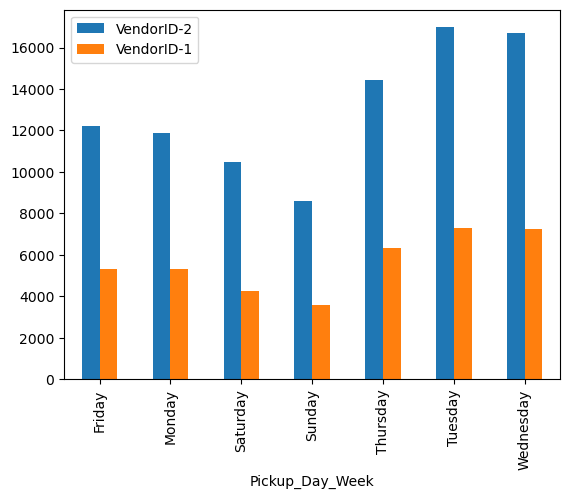

In [23]:
temp_pd_merge = pd.merge(temp_pd, temp_pd1, on=['Pickup_Day_Week'])
temp_pd_merge.plot.bar(stacked=False)

<AxesSubplot:xlabel='Hour_of_Day'>

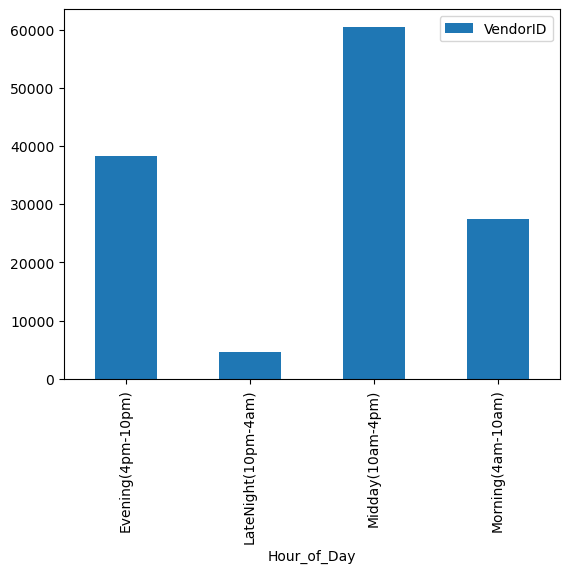

In [24]:
filter_trip_data[['VendorID','Hour_of_Day']].groupby('Hour_of_Day').\
                                                    count().plot.bar()

<AxesSubplot:xlabel='payment_type'>

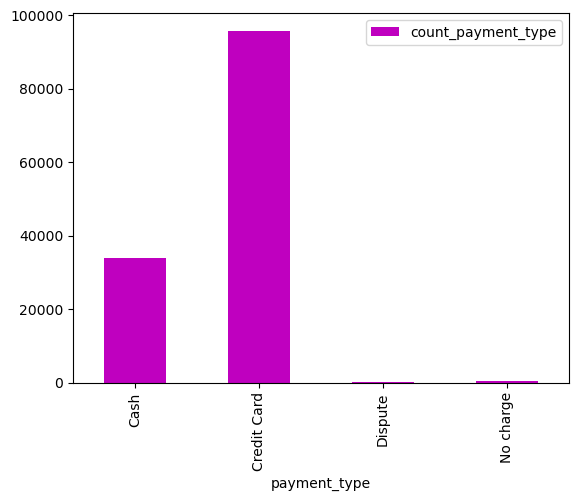

In [25]:
filter_trip_data.groupby('payment_type').agg({'VendorID':'count'}).reset_index().\
   rename(columns={'VendorID':'count_payment_type'}).set_index('payment_type').\
   plot.bar(color='m')

In [26]:
filter_trip_data[['trip_distance','Pickup_Zone','Drop_Zone']].\
                groupby(['Pickup_Zone','Drop_Zone']).\
                agg({'trip_distance': 'sum'}).\
                sort_values(by='trip_distance',ascending=False).head(4)

,,trip_distance
Pickup_Zone,Drop_Zone,
Upper East Side South,Upper East Side North,1301.36
NV,NV,1181.75
Upper East Side North,Upper East Side South,1098.23
Midtown Center,Upper East Side North,686.76


In [27]:
filter_trip_data[['total_amount','Pickup_Zone','Drop_Zone']].\
                groupby(['Pickup_Zone','Drop_Zone']).\
                agg({'total_amount': 'sum'}).\
                sort_values(by='total_amount',ascending=False).head(4)

total_amount
Pickup_Zone           Drop_Zone                          
Upper East Side South Upper East Side North      14285.53
Upper East Side North Upper East Side South      12724.62
                      Upper East Side North       8974.29
Upper East Side South Upper East Side South       8094.84

In [28]:
filter_trip_data[['trip_duration(min)','Pickup_Zone','Drop_Zone']].\
                groupby(['Pickup_Zone','Drop_Zone']).\
                agg({'trip_duration(min)': 'sum'}).\
                sort_values(by='trip_duration(min)',ascending=False).head(4)

trip_duration(min)
Pickup_Zone           Drop_Zone                                
Upper East Side North Upper East Side South            14059.01
Upper East Side South Upper East Side North             9893.68
                      Upper East Side South             7107.31
Lenox Hill East       Upper East Side South             6282.54

In [29]:
filter_trip_data[['congestion_surcharge','Pickup_Zone','Drop_Zone']].\
                groupby(['Pickup_Zone','Drop_Zone']).\
                agg({'congestion_surcharge': 'sum'}).\
                sort_values(by='congestion_surcharge',ascending=False).head(4)

congestion_surcharge
Pickup_Zone           Drop_Zone                                  
Upper East Side South Upper East Side North                3022.5
Upper East Side North Upper East Side South                2592.5
                      Upper East Side North                2237.5
Upper East Side South Upper East Side South                1917.5

In [30]:
filter_trip_data[['tolls_amount','Pickup_Zone','Drop_Zone']].\
                groupby(['Pickup_Zone','Drop_Zone']).\
                agg({'tolls_amount': 'sum'}).\
                sort_values(by='tolls_amount',ascending=False).head(4)

tolls_amount
Pickup_Zone       Drop_Zone                   
LaGuardia Airport Yorkville West        171.36
NV                NV                    167.58
LaGuardia Airport Clinton East          165.24
                  Yorkville East        159.12

## Inferences-4

* Based on the available data, 'VeriFone Inc' has higher market share than 'Creative Mobile Technogies'

* On Tuesday and Wednesday, highest number of trips are made and people have opted 'VeriFone Inc' taxis mostly

* During 'Midday(10am-4pm)' highest number of trips are made

* Credit card is preferred payment mode followed by cash

* Maximum trip distance is made between 'Upper East Side South' and 'Upper East Side North'

* Maximum trip amount is paid between 'Upper East Side South' and 'Upper East Side North'

* Maximum trip duration is between 'Upper East Side South' and 'Upper East Side North'

* As obvious maximum congestion surcharge is paid between 'Upper East Side South' and 'Upper East Side North'

* Maximum toll charge is paid between 'LaGuardia Airport' and 'Yorkville West'